# **Hand_Written_Digital_Prediction_Classification_Analysis**

# **Import Library**

In [64]:
import pandas as pd

In [65]:
import numpy as np

In [66]:
import matplotlib.pyplot as plt


In [67]:
from sklearn.datasets import load_digits

# **Import Data**

In [68]:
df = load_digits()

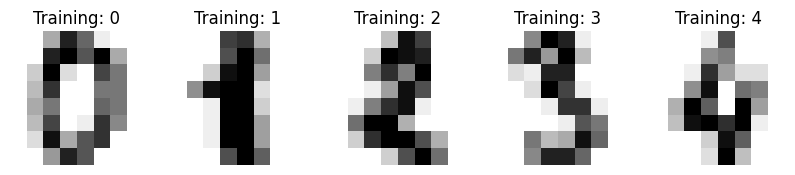

In [69]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize= (10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# **Data processing**

In [70]:
df.images.shape

(1797, 8, 8)

In [71]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [72]:
df.images[0].shape

(8, 8)

In [73]:
len(df.images)

1797

In [74]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [75]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [76]:
data[0].shape

(64,)

In [77]:
data.shape

(1797, 64)

# **scaling image data**

```
# This is formatted as code
```



In [78]:
data.min()

0.0

In [79]:
data.max()

16.0

In [80]:
data = data/16

In [81]:
data.min()

0.0

In [82]:
data.max()

1.0

In [83]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **train test split data**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test= train_test_split(data, df.target,train_size=0.3)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((539, 64), (1258, 64), (539,), (1258,))

# **random forest model**

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier()

In [88]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# **predict test data**

In [89]:
y_pred = rf.predict(X_test)

In [90]:
y_pred

array([6, 5, 9, ..., 3, 6, 8])

# **model accuracy**

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
confusion_matrix(y_test, y_pred)

array([[120,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 125,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0, 130,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 113,   0,   3,   0,   2,   2,   0],
       [  0,   1,   0,   0, 114,   0,   0,   1,   1,   0],
       [  0,   0,   0,   2,   1, 113,   0,   0,   1,   1],
       [  1,   2,   0,   0,   1,   1, 132,   0,   1,   0],
       [  1,   0,   0,   0,   1,   1,   0, 128,   0,   0],
       [  0,   5,   0,   1,   1,   1,   1,   0, 109,   0],
       [  0,   0,   0,   6,   0,   2,   0,   3,  10, 117]])

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       121
           1       0.93      0.99      0.96       126
           2       1.00      1.00      1.00       130
           3       0.92      0.93      0.93       121
           4       0.96      0.97      0.97       117
           5       0.93      0.96      0.95       118
           6       0.99      0.96      0.97       138
           7       0.96      0.98      0.97       131
           8       0.88      0.92      0.90       118
           9       0.99      0.85      0.91       138

    accuracy                           0.95      1258
   macro avg       0.95      0.96      0.95      1258
weighted avg       0.96      0.95      0.95      1258

